In [2]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
import warnings
import warnings
warnings.filterwarnings('ignore')

E:\python\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Reading csv file using pandas
dch=pd.read_csv("cardio_train.csv",sep=";",index_col="id")

In [4]:
dch.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
#Checking the datatypes
dch.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
dch.shape

(69301, 12)

In [7]:
#Checking null values
dch.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#converting days to years
dch['age']=dch['age']/365

In [9]:
dch=dch.astype(int)

In [10]:
dch.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,61,1,155,69,130,80,2,2,0,0,1,0
989,40,1,163,71,110,70,1,1,0,0,1,1
990,60,1,165,70,120,80,1,1,0,0,1,0
991,39,2,165,85,120,80,1,1,1,1,1,0
992,64,1,155,62,120,80,1,1,0,0,1,0


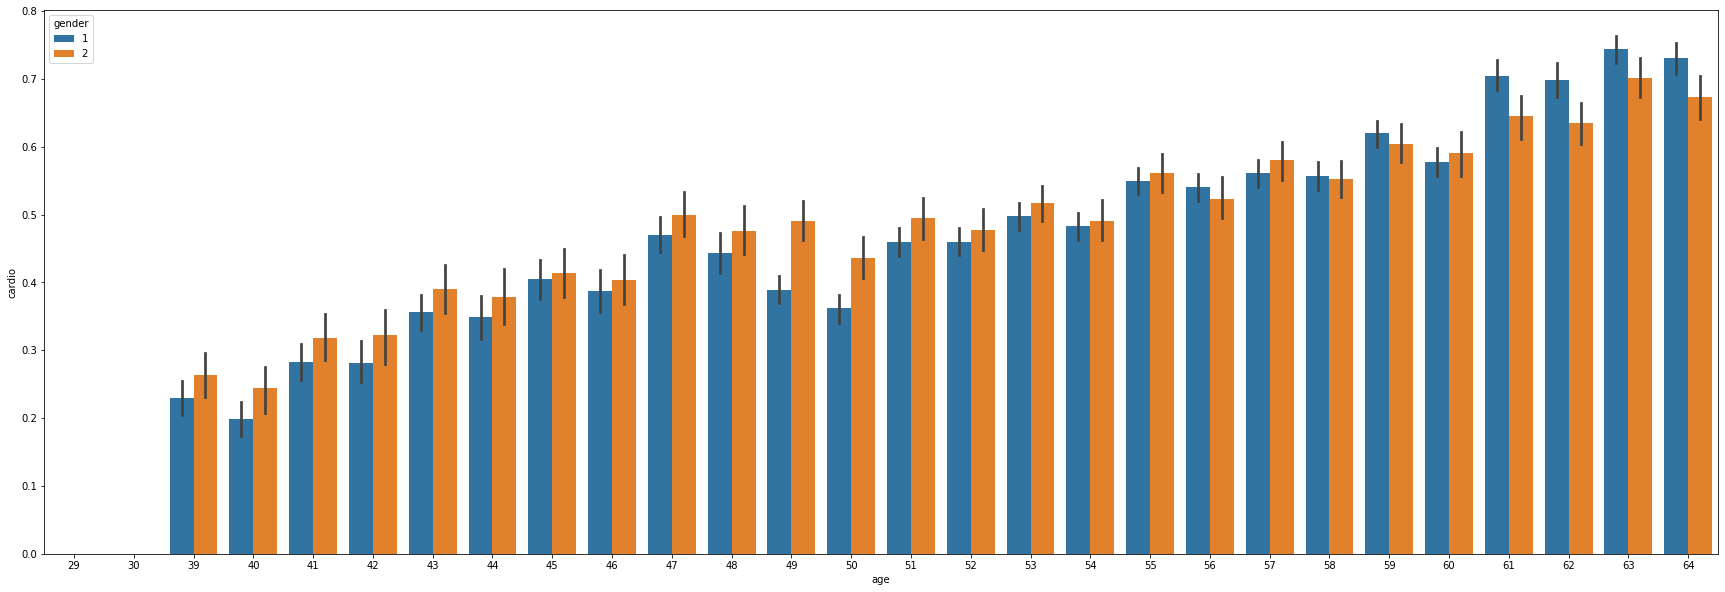

In [11]:
# Checking age of the person versus disease 
plt.figure(figsize=(30,10))
sns.barplot(x="age",y="cardio",hue="gender",data=dch)
# As age increases the chances of cardio vascular disease presence increases

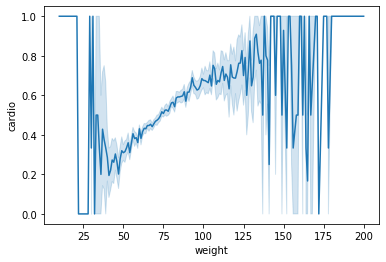

In [12]:
sns.lineplot(x="weight",y="cardio",data=dch)
# as weight increases the chances of cardio vascular disease presence increases

In [13]:
dch.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,52.840681,1.349519,164.362217,74.201671,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.766685,0.476821,8.205337,14.383654,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


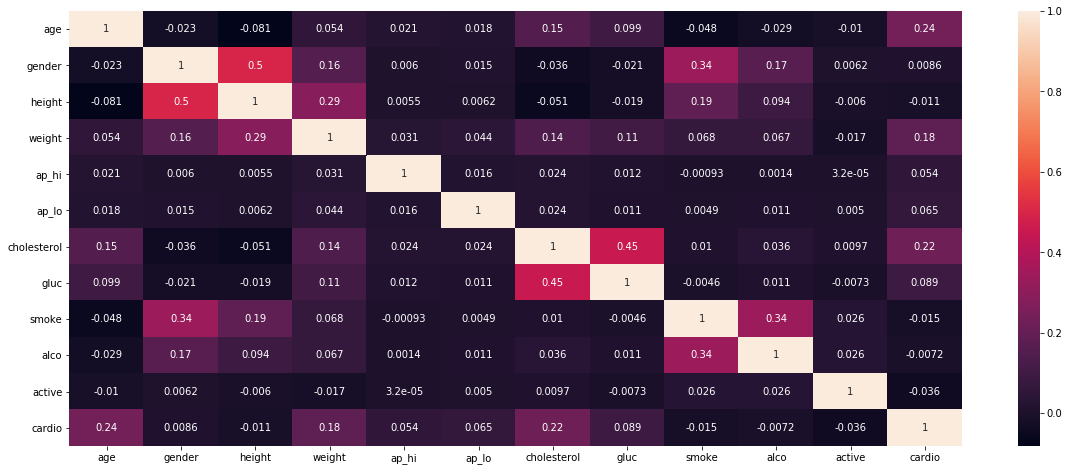

In [14]:
#Checking correlation
plt.figure(figsize=(20,8))
sns.heatmap(dch.corr(),annot=True)

In [15]:
#Taking input variable
x=dch.iloc[:,:-1]

In [16]:
#using standard scaler technique
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [17]:
#Taking output variable
y=dch.iloc[:,-1]

In [18]:
#Performing Logistic regression checking for random state value
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
max_acc_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("accuracy_score:",r_state,"is",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print(final_r_state)
print(max_acc_score)

accuracy_score: 40 is 0.7191400331866388
accuracy_score: 41 is 0.7220979727292404
accuracy_score: 42 is 0.7225308419305967
accuracy_score: 43 is 0.7228915662650602
accuracy_score: 44 is 0.7282302864151216
accuracy_score: 45 is 0.7171199769136426
accuracy_score: 46 is 0.7285188658826924
accuracy_score: 47 is 0.7170478320467498
accuracy_score: 48 is 0.7168313974460717
accuracy_score: 49 is 0.7208715099920641
accuracy_score: 50 is 0.7215929586609913
accuracy_score: 51 is 0.7169035423129644
accuracy_score: 52 is 0.7182742947839261
accuracy_score: 53 is 0.722963711131953
accuracy_score: 54 is 0.7203664959238151
accuracy_score: 55 is 0.7152442103744319
accuracy_score: 56 is 0.7254887814731982
accuracy_score: 57 is 0.7183464396508188
accuracy_score: 58 is 0.7220258278623476
accuracy_score: 59 is 0.7200779164562442
accuracy_score: 60 is 0.7160378039102517
accuracy_score: 61 is 0.7275088377461943
accuracy_score: 62 is 0.7205829305244932
accuracy_score: 63 is 0.7303946324219032
accuracy_score: 6

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
KNN=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression(random_state=63)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rf=RandomForestClassifier()

In [22]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(("RandomForestClassifier",rf))

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc auc score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
  

************************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy_score= 0.6487266430993435


Cross_val_score= 0.6516501141014197


roc auc score= 0.6488742092725803


Classification report
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      6898
           1       0.66      0.62      0.64      6963

    accuracy                           0.65     13861
   macro avg       0.65      0.65      0.65     13861
weighted avg       0.65      0.65      0.65     13861



[[4693 2205]
 [2664 4299]]


************************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, rando

In [24]:
#Checking all classifiers cross val score and roc_auc_score
result=pd.DataFrame({'Model': Model, 'Accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,64.872664,65.165011,64.887421
1,SVC,73.183753,72.853215,73.201264
2,LogisticRegression,72.310800,72.058132,72.330964
3,DecisionTreeClassifier,63.747204,63.840359,63.753343
4,GaussianNB,59.115504,59.056858,59.251390
5,RandomForestClassifier,70.774114,70.802729,70.775603
